In [1]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex. tools import input_factory


Missing compiler_cxx fix for MSVCCompiler
nr of spikes: 18


WARNING    Cannot use weave, a test compilation failed: error: Microsoft Visual C++ 9.0 is required. Get it from http://aka.ms/vcpython27 (CompileError) [brian2.codegen.runtime.weave_rt.weave_rt.failed_compile_test]
WARNING    D:\Programas\Miniconda2\envs\bmnn\lib\site-packages\Cython\Compiler\Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\Renan\.cython\brian_extensions\_cython_magic_27b00bb86644851871cb5598a1fc7683.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
 [py.warnings]
WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 9.0 is required. Get it from http://aka.ms/vcpython27 (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manua

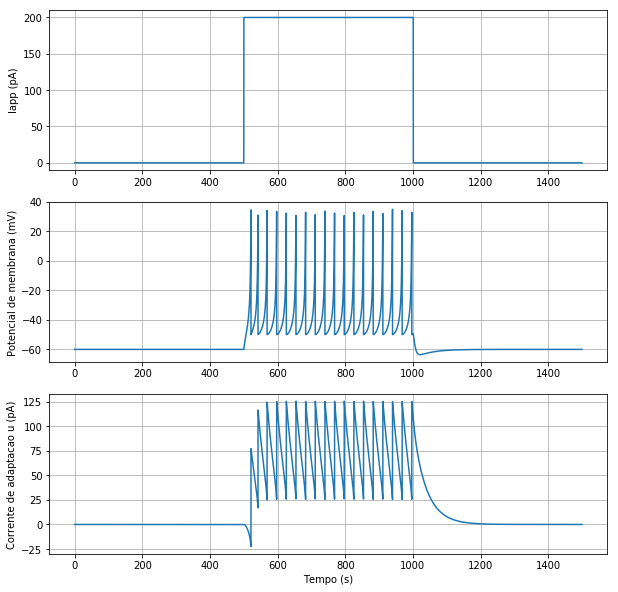

In [2]:
v_rest= -60*b2.mV #EL
v_reset= -50*b2.mV #Vreset
conductance_L = 10*b2.nsiemens #GL
membrane_capacitance = 100*b2.pF #CM
firing_threshold = -40* b2.mV #Vth
deltaVth = 2*b2.mV

a = 0.03/(b2.ms)
b = -2*(b2.pA/b2.mV)
k = 0.7*b2.pA/(b2.mV**2)
d = 100*b2.pA 

tau_w = 200*b2.ms
v_max = 35*b2.mV

simulation_time = 1500

current = 200
input_current = input_factory.get_step_current(
t_start=500, t_end=1000, unit_time=b2.ms,
amplitude=current*b2.pA) 

eqs = """
dv/dt = ((k/membrane_capacitance)*(((v - v_rest)*(v - firing_threshold)))
        - (u/membrane_capacitance)
        + (input_current(t,i)/membrane_capacitance))  : volt
du/dt = (a)*(b*(v - v_rest) - u) : amp
"""
neuron = b2.NeuronGroup(1, model=eqs, reset="v=v_reset; u=u+d", threshold="v>v_max", method="euler")
neuron.v = v_rest
neuron.u = 0*b2.pA

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v", "u"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)
# run the simulation
b2.run(simulation_time*b2.ms)

print("nr of spikes: {}".format(spike_monitor.count[0]))
#print("spikes times: {}".format(spike_monitor.t[:]))

fig = plt.figure(figsize=(10,10))

fig.add_subplot(3,1,1)
c = input_current(state_monitor.t, 0)
plt.plot(state_monitor.t/b2.ms, c/b2.pA )
plt.ylabel('Iapp (pA)')
plt.grid()

fig.add_subplot(3,1,2)
plt.plot(state_monitor.t/b2.ms, state_monitor.v[0]/b2.mV)

plt.ylabel('Potencial de membrana (mV)')
plt.grid()
#plt.legend(["vm", "firing threshold"], fontsize=12)

fig.add_subplot(3,1,3)
plt.plot(state_monitor.t/b2.ms, state_monitor.u[0]/b2.pA)
plt.grid()
plt.xlabel('Tempo (s)')
plt.ylabel('Corrente de adaptacao u (pA)')

plt.show()



WARNING    "input_current" is an internal variable of group "neurongroup", but also exists in the run namespace with the value array([100, 110, 120, ..., 270, 280, 290]). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


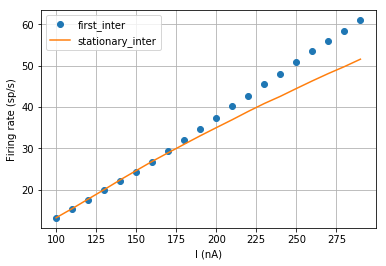

In [4]:
v_rest= -60*b2.mV #EL
v_reset= -50*b2.mV #Vreset
conductance_L = 10*b2.nsiemens #GL
membrane_capacitance = 100*b2.pF #CM
firing_threshold = -40* b2.mV #Vth
deltaVth = 2*b2.mV

a = 0.03/(b2.ms)
b = -2*(b2.pA/b2.mV)
k = 0.7*b2.pA/(b2.mV**2)
d = 100*b2.pA 

tau_w = 200*b2.ms
v_max = 35*b2.mV

simulation_time = 5
#current = 200.01 * b2.pamp
input_current = np.arange(100, 300, 10)
# differential equation of Leaky Integrate-and-Fire model
eqs = """
dv/dt = ((k/membrane_capacitance)*(((v - v_rest)*(v - firing_threshold)))
        - (u/membrane_capacitance)
        + (input_current/membrane_capacitance))  : volt
du/dt = (a)*(b*(v - v_rest) - u) : amp
input_current : amp
"""
neuron = b2.NeuronGroup(len(input_current), model=eqs, reset="v=v_reset; u=u+d", threshold="v>v_max", method="euler")
neuron.v = v_rest
neuron.u = 0*b2.pA
neuron.input_current = input_current*b2.pA

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v","u"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)
# run the simulation
b2.run(simulation_time*b2.second)

#plot
# input_current = [None]*len(current)
# for i in range(len(current)):
#     input_current[i] = input_factory.get_step_current(t_start=0, t_end=simulation_time, unit_time=b2.second,
#     amplitude= current[i]*b2.nA) 
#     plot_tools.plot_voltage_and_current_traces(
#     state_monitor, input_current[i], title="min input", firing_threshold=firing_threshold)

plt.figure(1)
first_inter = [None]*len(input_current)
stationary_inter = [None]*len(input_current)
for i in range(len(input_current)):
    first_inter[i] = 1/(float(spike_monitor.spike_trains()[i][2]) - float(spike_monitor.spike_trains()[i][1]))
    stationary_inter[i] = 1/(float(spike_monitor.spike_trains()[i][-2]) - float(spike_monitor.spike_trains()[i][-3]))
    

#plt.plot(neuron.input_current/b2.pA, spike_monitor.count/simulation_time, '*', label='count')
plt.plot(neuron.input_current/b2.pA, first_inter/b2.second, 'o', label='first_inter')
plt.plot(neuron.input_current/b2.pA, stationary_inter/b2.second, label='stationary_inter')
plt.xlabel('I (nA)')
plt.ylabel('Firing rate (sp/s)')
plt.legend()
plt.grid()
plt.show()
